# Random_Forest Algorithm

In [1]:
#importing Libraries 

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

#Loading The PIMA Indian Diabetes dataset and Pre-Processing

In [3]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#Removing records with non-zero Insulin Attribute

In [4]:
#data.drop(data[data['Insulin'] <= 0].index, inplace = True)
data.drop(data[data['Insulin'] > 0].index, inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               374 non-null    int64  
 1   Glucose                   374 non-null    int64  
 2   BloodPressure             374 non-null    int64  
 3   SkinThickness             374 non-null    int64  
 4   Insulin                   374 non-null    int64  
 5   BMI                       374 non-null    float64
 6   DiabetesPedigreeFunction  374 non-null    float64
 7   Age                       374 non-null    int64  
 8   Outcome                   374 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.2 KB


#Dropping features one at a time with lowest correlation to check if it affects accuracy

In [6]:
x =data[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']]

#x = data[['Pregnancies','Glucose','SkinThickness','BMI','DiabetesPedigreeFunction','Age']] # BloodPressure drp
#x = data[['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']] #SkinThickness drp
#x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction',]] # Age drp
#x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','BMI','Age']] #'DiabetesPedigreeFunction' drp
#x = data[['Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction','Age']] # Pregnancies drp

y = data['Outcome']

#Dividing the dataset into training and testing

In [7]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42 , shuffle = False)

In [8]:
# defining the Random Forest classifier on training set

r_classifier = RandomForestClassifier(n_estimators=100 ,  random_state = 42)
r_classifier.fit(x_train , y_train)

RandomForestClassifier(random_state=42)

In [9]:
# using trained classifier on testing set for prediction 

y_pred = r_classifier.predict(x_test) #accuracy using matrics
print('Accuracy Score:' , metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.76


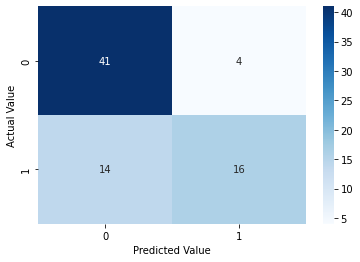

In [10]:
# Confusion Matrix

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,y_pred,labels = [0 ,1])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

In [11]:
# calculating recall

recall =  recall_score(y_test, y_pred)
print(f"Recall score is :{recall}")

Recall score is :0.5333333333333333


In [12]:
# calculating Precision

precision =  precision_score(y_test, y_pred)
print(f"Precision score is :{precision}")

Precision score is :0.8


In [13]:
# calculating F1 Score

f1_score = 2 * (precision * recall) / (precision + recall)
print(f"F1 score is :{f1_score}")

F1 score is :0.64
